<a href="https://colab.research.google.com/github/acen20/Image-Processing/blob/main/Sobel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [299]:
!curl -o islamabad.png https://raw.githubusercontent.com/acen20/Image-Processing/main/islamabad.png
!curl -o buic.png https://raw.githubusercontent.com/acen20/Image-Processing/main/buic.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  709k  100  709k    0     0  1147k      0 --:--:-- --:--:-- --:--:-- 1145k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  333k  100  333k    0     0  3203k      0 --:--:-- --:--:-- --:--:-- 3203k


In [300]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import PIL
import torchvision.transforms.functional as transform
import torch

In [301]:
original_img = mpimg.imread('islamabad.png')
# The image can be converted to tensor using
tensor_image = transform.to_tensor(original_img)

## Original Image

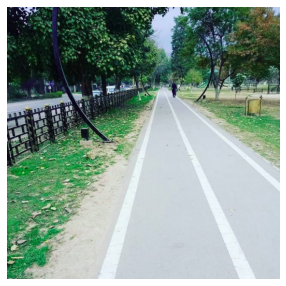

In [302]:
plt.figure(figsize = (16,5))
plt.axis("off")
_ = plt.imshow(original_img)

## Image Manipulation

In [303]:
threshold = 0.9
tensor_image[tensor_image >= threshold] = 255
tensor_image[tensor_image < threshold] = 0

In [304]:
tensor_image = torch.nn.functional.avg_pool2d(tensor_image, (2,2))

In [305]:
print(tensor_image.shape)

torch.Size([4, 308, 308])


In [306]:
_, img_h, img_w = tensor_image.shape

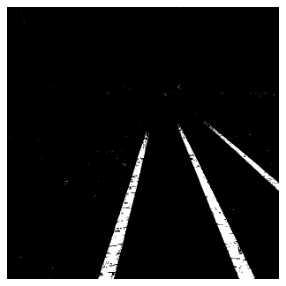

In [307]:
plt.figure(figsize = (16,5))
plt.axis("off")
_ = plt.imshow(tensor_image[0], cmap = "gray")

## Sobel Horizontal

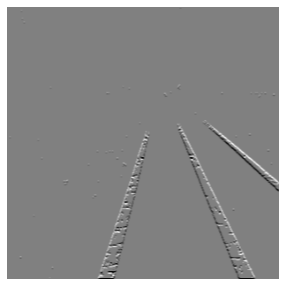

In [308]:
filter = torch.tensor([[-1,-2,-1],[0,0,0],[1,2,1]], dtype=torch.float)
conv2_hor = torch.nn.functional.conv2d(tensor_image.reshape(-1,1,img_h,img_w), filter.reshape(1,1,3,3), stride = 1, padding = 1)
plt.figure(figsize = (16,5))
plt.axis("off")
_ = plt.imshow(conv2_hor.detach()[0][0], cmap = "gray")

## Sobel Vertical

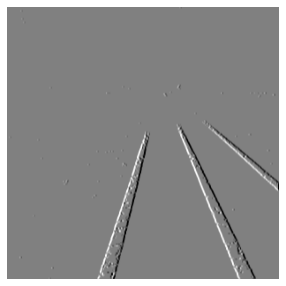

In [309]:
conv2_vert = torch.nn.functional.conv2d(tensor_image.reshape(-1,1,img_h,img_w), filter.T.reshape(1,1,3,3), stride = 1, padding = 1)
plt.figure(figsize = (16,5))
plt.axis("off")
_ = plt.imshow(conv2_vert.detach()[0][0], cmap = "gray")

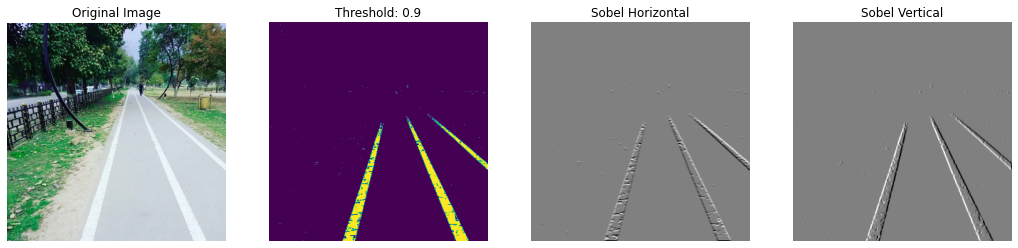

In [313]:
plt.figure(figsize = (18,18))
plt.subplot(1,4,1)
plt.axis("off")
plt.title(f"Original Image")
plt.imshow(original_img)

plt.subplot(1,4,2)
plt.axis("off")
plt.title(f"Threshold: {threshold}")
plt.imshow(tensor_image[0])

plt.subplot(1,4,3)
plt.axis("off")
plt.title(f"Sobel Horizontal")
plt.imshow(conv2_hor.detach()[0][0], cmap="gray")

plt.subplot(1,4,4)
plt.axis("off")
plt.title(f"Sobel Vertical")
_ = plt.imshow(conv2_vert.detach()[0][0], cmap="gray")